<h1 style="text-align: center;" markdown="1">Token Embedding</h1>


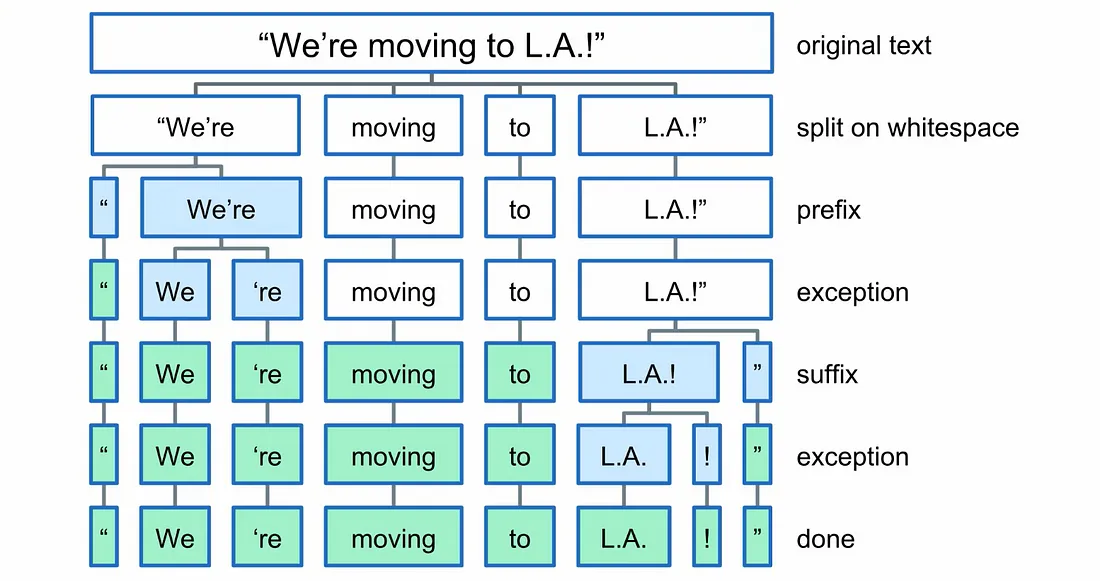

In [1]:
import torch
import numpy as np

In [2]:
english_file = 'hindi/train.en'
kannada_file = 'hindi/train.hi'
# hindi_file ='train.hi'

START_TOKEN = '<START>'
PADDING_TOKEN = '<PADDING>'
END_TOKEN = '<END>'


In [3]:
# kannada_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
#                       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '?', 'ˌ', 
#                       'ँ', 'ఆ', 'ఇ', 'ా', 'ి', 'ీ', 'ు', 'ూ', 
#                       'ಅ', 'ಆ', 'ಇ', 'ಈ', 'ಉ', 'ಊ', 'ಋ', 'ೠ', 'ಌ', 'ಎ', 'ಏ', 'ಐ', 'ಒ', 'ಓ', 'ಔ', 
#                       'ಕ', 'ಖ', 'ಗ', 'ಘ', 'ಙ', 
#                       'ಚ', 'ಛ', 'ಜ', 'ಝ', 'ಞ', 
#                       'ಟ', 'ಠ', 'ಡ', 'ಢ', 'ಣ', 
#                       'ತ', 'ಥ', 'ದ', 'ಧ', 'ನ', 
#                       'ಪ', 'ಫ', 'ಬ', 'ಭ', 'ಮ', 
#                       'ಯ', 'ರ', 'ಱ', 'ಲ', 'ಳ', 'ವ', 'ಶ', 'ಷ', 'ಸ', 'ಹ', 
#                       '಼', 'ಽ', 'ಾ', 'ಿ', 'ೀ', 'ು', 'ೂ', 'ೃ', 'ೄ', 'ೆ', 'ೇ', 'ೈ', 'ೊ', 'ೋ', 'ೌ', '್', 'ೕ', 'ೖ', 'ೞ', 'ೣ', 'ಂ', 'ಃ', 
#                       '೦', '೧', '೨', '೩', '೪', '೫', '೬', '೭', '೮', '೯', PADDING_TOKEN, END_TOKEN]

english_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
                        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                        ':', '<', '=', '>', '?', '@', 
                        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 
                        'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 
                        'Y', 'Z',
                        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                        'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
                        'y', 'z', 
                        '{', '|', '}', '~', PADDING_TOKEN, END_TOKEN]

kannada_vocabulary = [
    START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '?', 'ˌ',
    'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'ऋ', 'अं', 'अ:',
    'क', 'ख', 'ग', 'घ', 'ड़', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह',
    'क्ष', 'त्र', 'ज्ञ', 'श्र',
    'ड़', 'ढ़',
    ' ा',	'ि',	'ी',	'ु',	'ू',	'ृ'	,'े',	'ॅ',	'ै',	'ो',	'ॉ',	'ौ', '{', '|', '}', '~',PADDING_TOKEN, END_TOKEN]

In [24]:
# hindi_vocabulary = [
#     START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
#     '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '?', 'ˌ',
#     'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'ऋ', 'अं', 'अ:',
#     'क', 'ख', 'ग', 'घ', 'ड़', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह',
#     'क्ष', 'त्र', 'ज्ञ', 'श्र',
#     'ड़', 'ढ़',
#     ' ा',	'ि',	'ी',	'ु',	'ू',	'ृ'	,'े',	'ॅ',	'ै',	'ो',	'ॉ',	'ौ',PADDING_TOKEN, END_TOKEN]

In [25]:
# english_vocabulary = [START_TOKEN, ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
#                         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
#                         ':', '<', '=', '>', '?', '@', 
#                         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 
#                         'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 
#                         'Y', 'Z',
#                         'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
#                         'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
#                         'y', 'z', 
#                         '{', '|', "}", '~', PADDING_TOKEN, END_TOKEN]

In [4]:
text ="आस्ट्रेलिया"
list(text)

['आ', 'स', '्', 'ट', '्', 'र', 'े', 'ल', 'ि', 'य', 'ा']

In [5]:
'आ' + 'स'+ '्'+ 'ट'+ '्'+ 'र'+ 'े'+ 'ल'+ 'ि'+ 'य'+ 'ा'

'आस्ट्रेलिया'

In [7]:
# We want to create index for each char of hindi and english

index_to_kannada = {k:v for k,v in enumerate(kannada_vocabulary)} # Dict. that map integer to char
kannada_to_index = {v:k for k,v in enumerate(kannada_vocabulary)} # Dict. that map char to integer
# index_to_hindi = {k:v for k,v in enumerate(hindi_vocabulary)}
# index_to_hindi = {v:k for k,v in enumerate(hindi_vocabulary)}
index_to_english = {k:v for k,v in enumerate(english_vocabulary)}
english_to_index = {v:k for k,v in enumerate(english_vocabulary)}

In [29]:
# index_to_hindi = {k: v for k,v in enumerate(hindi_vocabulary)}
# hindi_to_index = {v:k for k,v in enumerate(hindi_vocabulary)}
# index_to_english = {k: v for k,v in enumerate(english_vocabulary)}
# english_to_index = {v:k for k,v in enumerate(english_vocabulary)}

In [8]:

with open(english_file, 'r') as file:
    english_sentences = file.readlines()
with open(kannada_file, 'r') as file:
    kannada_sentences = file.readlines()
# with open(hindi_file, 'r') as file:
#     hindi_sentences = file.readlines()

# Limit Number of sentences
TOTAL_SENTENCES = 100000
english_sentences = english_sentences[:TOTAL_SENTENCES]
kannada_sentences = kannada_sentences[:TOTAL_SENTENCES]
# hindi_sentences = hindi_sentences[:TOTAL_SENTENCES]

english_sentences = [sentence.rstrip('\n') for sentence in english_sentences] # Get rid of new line characters at the end of each sentences
kannada_sentences = [sentence.rstrip('\n') for sentence in kannada_sentences]
# hindi_sentences = [sentence.rstrip('\n') for sentence in hindi_sentences] 


In [31]:
# with open(english_file, 'r') as file:
#     english_sentences = file.readline()
# with open(hindi_file, 'r') as file:
#     hindi_sentences = file.readline()

# # Total_sentences = 10000
# # english_sentences = english_sentences[: Total_sentences]
# # hindi_sentences = hindi_sentences[: Total_sentences]
# english_sentences = [sentence.rstrip('\n') for sentence in english_sentences]
# hindi_sentences = [sentence.rstrip('\n') for sentence in hindi_sentences]

In [9]:
english_sentences[:10]

["However, Paes, who was partnering Australia's Paul Hanley, could only go as far as the quarterfinals where they lost to Bhupathi and Knowles",
 'Whosoever desires the reward of the world, with Allah is the reward of the world and of the Everlasting Life. Allah is the Hearer, the Seer.',
 'The value of insects in the biosphere is enormous because they outnumber all other living groups in measure of species richness.',
 'Mithali To Anchor Indian Team Against Australia in ODIs',
 'After the assent of the Honble President on 8thSeptember, 2016, the 101thConstitutional Amendment Act, 2016 came into existence',
 'The court has fixed a hearing for February 12',
 'Please select the position where the track should be split.',
 'As per police, armys 22RR, special operation Group (SOG) of police and the Central Reserve Police Force (CRPF) cordoned the village and launched search operation in the area.',
 'Jharkhand chief minister Hemant Soren',
 'Arvind Kumar, SHO of the sector 55/56 police sta

In [33]:
# hindi_sentences[:10]

In [10]:
kannada_sentences[:10]

['आस्ट्रेलिया के पाल हेनली के साथ जोड़ी बनाने वाले पेस मियामी में क्वार्टरफाइनल तक ही पहुंच सके क्योंकि इस दौर में उन्हें भूपति और नोल्स ने हराया था।',
 'और जो शख्स (अपने आमाल का) बदला दुनिया ही में चाहता है तो ख़ुदा के पास दुनिया व आख़िरत दोनों का अज्र मौजूद है और ख़ुदा तो हर शख्स की सुनता और सबको देखता है',
 'जैव-मंडल में कीड़ों का मूल्य बहुत है, क्योंकि प्रजातियों की समृद्धि के मामले में उनकी संख्या अन्य जीव समूहों से ज़्यादा है।',
 'आस्ट्रेलिया के खिलाफ वनडे टीम की कमान मिताली को',
 '8 सितम्\u200dबर, 2016 को माननीय राष्\u200dट्रपति की स्\u200dवीकृति मिलने के बाद 101वां संविधान संशोधन अधिनियम, 2016 अस्तित्\u200dव में आया',
 'अदालत ने इस मामले में आगे की सुनवाई के लिए एक फरवरी की तारीख़ तय की',
 'जहाँ पर ट्रैक को विभाजित किया जाना है, कृपया वह स्थान चुनें.',
 'इसके तुरंत बाद सेना की 22 राष्ट्रीय राइफल्स (आरआर), सीआरपीएफ और पुलिस के स्पेशल ऑपरेशन ग्रुप (एसओजी) के जवानों द्वारा इलाके की घेराबंदी कर तलाशी अभियान चलाया।',
 'झारखंड के मुख्यमंत्री हेमंत सोरेन (फोटोः पीटीआई)',
 'सेक्टर 55/56

In [11]:
max(len(x) for x in kannada_sentences) , max(len(x) for x in english_sentences) # lenght of longest sentences in each dataset

(3270, 2620)

In [12]:
PERCENTILE = 97 # we'll se the lenght of 97% sentences
print(f"{PERCENTILE}th percentile lenght hindi: {np.percentile([len(x) for x in kannada_sentences], PERCENTILE)}")
print(f"{PERCENTILE}th percentile lenght English: {np.percentile([len(x) for x in english_sentences], PERCENTILE)}")

97th percentile lenght hindi: 258.0
97th percentile lenght English: 267.02999999999884


so it means 97% of hindi sentences have less than 258 char and 268 in case of english

In [13]:

max_sequence_length = 290

def is_valid_tokens(sentence, vocab): # to check if the tokens present in sentence have the same char. that we defined in vocabulary
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True

def is_valid_length(sentence, max_sequence_length):
    return len(list(sentence)) < (max_sequence_length - 1) # need to re-add the end token so leaving 1 space

valid_sentence_indicies = []
for index in range(len(kannada_sentences)):
    kannada_sentence, english_sentence = kannada_sentences[index], english_sentences[index]
    if is_valid_length(kannada_sentence, max_sequence_length) \
      and is_valid_length(english_sentence, max_sequence_length) \
      and is_valid_tokens(kannada_sentence, kannada_vocabulary):
        valid_sentence_indicies.append(index)

print(f"Number of sentences: {len(kannada_sentences)}")
print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

Number of sentences: 100000
Number of valid sentences: 294


In [38]:
# max_seq_len = 200

# def is_valid_tokens(sentence, vocab):
#     for token in list(set(sentence)):
#         if token not in vocab:
#             return False
#     return True

# def is_valid_length(sentence, max_seq_len):
#     return len(list(sentence)) < (max_seq_len-1) # need to re-add the end token so leaving space

# valid_sentence_indices = []
# for index in range(len(hindi_sentences)):
#     hindi_sentences, english_sentences = hindi_sentences[index] , english_sentences[index]
#     if is_valid_length(hindi_sentences, max_seq_len) \
#     and is_valid_length(english_sentences, max_seq_len) \
#     and is_valid_tokens(hindi_sentences, hindi_vocabulary):
#         valid_sentence_indices

# print(f"Number of sentences: {len(hindi_sentences)}")
# print(f"Number of valid sentences: {len(valid_sentence_indices)}")

In [14]:
kannada_sentences = [kannada_sentences[i] for i in valid_sentence_indicies]
english_sentences = [english_sentences[i] for i in valid_sentence_indicies]

In [15]:
kannada_sentences[:5], english_sentences[:5]

(['वे रुक गये है.', 'अधिक लेनदेन', 'यूआरएल', 'फोटो- एएनआई', 'बैटरी'],
 ["They've stopped.",
  'brisk trading',
  '< b > Source URL < / b > < b >',
  'Photo- ANI',
  'electric cell'])

Now we are going to create a dataset

In [16]:
from torch.utils.data import Dataset, DataLoader

In [17]:
class TextDataset(Dataset):
    def __init__(self, english_sentences, kannada_sentences):
        self.english_sentences= english_sentences
        self.kannada_sentences = kannada_sentences
    
    def __len__(self): # should return the number of items in dataset
        return len(self.english_sentences)
    
    def __getitem__(self, idx): # Take index and retirve coressponding english and hindi sentence
        return self.english_sentences[idx], self.kannada_sentences[idx]

In [18]:
dataset = TextDataset(english_sentences, kannada_sentences)

In [19]:
len(dataset)

294

In [22]:
dataset[100]

('Speaking on the occasion, Dr.', 'इस मौके पर बोलते हुए डॉ.')

In [23]:
batch_size = 3
train_loader = DataLoader(dataset, batch_size)
iterator = iter(train_loader)

In [24]:
for batch_num, batch in enumerate(iterator):
    print(batch)
    if batch_num>3:
        break

[("They've stopped.", 'brisk trading', '< b > Source URL < / b > < b >'), ('वे रुक गये है.', 'अधिक लेनदेन', 'यूआरएल')]
[('Photo- ANI', 'electric cell', 'Flax seeds'), ('फोटो- एएनआई', 'बैटरी', 'लौकी के बीज')]
[('Less than a minute', 'Small beginning', 'Jeene Do'), ('एक मिनट से कम पहले', 'एक छोटी शुरुआत', 'जीने दो')]
[('And then it happened', 'Take a look how.', 'Access time'), ('और फिर यह हुआ', 'देखिए कैसे.', 'अभिगम समय/अवधि')]
[('For now.', 'All photos by author', '2000 crore shelf limit.'), ('अभी के लिए -.', 'सभी फोटो: लेखक', 'होगी 2000 रुपये की लिमिट')]


In [27]:
# Tokenization
def tokenize(sentence, language_to_index, start_token=True, end_token=True): # Sentence , char to number embedding , S.T , E.T
    sentence_word_indicies = [language_to_index[token] for token in list(sentence)]

    if start_token: # Add to start of sentence
        sentence_word_indicies.insert(0, language_to_index[START_TOKEN])

    if end_token: # Add  to end of sentence
        sentence_word_indicies.append(language_to_index[END_TOKEN])

    for _ in range(len(sentence_word_indicies), max_sequence_length): # Adding Pad token in end
        sentence_word_indicies.append(language_to_index[PADDING_TOKEN])

    return torch.tensor(sentence_word_indicies) # Return torch tensor instead of python list

In [29]:
batch

[('For now.', 'All photos by author', '2000 crore shelf limit.'),
 ('अभी के लिए -.', 'सभी फोटो: लेखक', 'होगी 2000 रुपये की लिमिट')]

In [30]:
eng_tokenized, kn_tokenized = [], [] # Empty lists add tokens of corresponding lang. in the sentences

for sentence_num in range(batch_size):
    eng_sentence, kn_sentence = batch[0][sentence_num], batch[1][sentence_num]

    eng_tokenized.append( tokenize(eng_sentence, english_to_index, start_token=False, end_token=False) ) # No need of S.T & E.T bcz we have entire sentence anyways
    kn_tokenized.append( tokenize(kn_sentence, kannada_to_index, start_token=True, end_token=True) ) # We need S.T During generation phase in decoder

eng_tokenized = torch.stack(eng_tokenized)
kn_tokenized = torch.stack(kn_tokenized)

In [31]:
kn_tokenized

tensor([[  0,  33,  69,  87,   1,  46,  91,   1,  73,  86,  39,   1,  14,  15,
         102, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
         101, 101, 101, 101, 101, 101, 101, 101, 101

102 is end token and 101 are padding token

In [33]:
eng_tokenized

tensor([[38, 73, 76,  1, 72, 73, 81, 15, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,
         89, 89, 89, 89, 89,

In [34]:
# The only type of masking we need in encoder part is padding mask
NEG_INFTY = -1e9 # insted of -inf we are using very small number (for mask in decoder), this is done so that during softmask
# e^0 is 1 which means pass, e^ -inf is 0 that is dont pass through
# we dont want complete row to be zero in some cases which can result into numerical unstability (0/ i.e NaN) thats why we use -1e9.
# To avoid this we input very neglegible info.

def create_masks(eng_batch, kn_batch):
    num_sentences = len(eng_batch)

    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length] , True) # For decoder
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)

    encoder_padding_mask = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_self_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_cross_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)

    for idx in range(num_sentences):
      eng_sentence_length, kn_sentence_length = len(eng_batch[idx]), len(kn_batch[idx])

      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      kn_chars_to_padding_mask = np.arange(kn_sentence_length + 1, max_sequence_length)

      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True

      decoder_padding_mask_self_attention[idx, :, kn_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, kn_chars_to_padding_mask, :] = True
      
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, kn_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    print(f"encoder_self_attention_mask {encoder_self_attention_mask.size()}: {encoder_self_attention_mask[0, :10, :10]}")
    print(f"decoder_self_attention_mask {decoder_self_attention_mask.size()}: {decoder_self_attention_mask[0, :10, :10]}")
    print(f"decoder_cross_attention_mask {decoder_cross_attention_mask.size()}: {decoder_cross_attention_mask[0, :10, :10]}")
    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

In [37]:
create_masks(batch[0], batch[1])

encoder_self_attention_mask torch.Size([3, 290, 290]): tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0000e+09],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

(tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          ...,
          [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [-1.0000e+09, -1.0000e+09, -1.0000e+09,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09]],
 
         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.0000e+09,
           -1.0000e+09, -1.0000e+09],
          ...,
    

In [70]:
from torch import nn

class SentenceEmbedding(nn.Module):
    "For a given sentence, create an embedding"
    def __init__(self, max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
        super().__init__()
        self.vocab_size = len(language_to_index)
        self.max_sequence_length = max_sequence_length
        self.embedding = nn.Embedding(self.vocab_size, d_model)
        self.language_to_index = language_to_index
        self.position_encoder = PositionalEncoding(d_model, max_sequence_length)
        self.dropout = nn.Dropout(p=0.1)
        self.START_TOKEN = START_TOKEN
        self.END_TOKEN = END_TOKEN
        self.PADDING_TOKEN = PADDING_TOKEN
    
    def batch_tokenize(self, batch, start_token=True, end_token=True):

        def tokenize(sentence, start_token=True, end_token=True):
            sentence_word_indicies = [self.language_to_index[token] for token in list(sentence)]
            if start_token:
                sentence_word_indicies.insert(0, self.language_to_index[self.START_TOKEN])
            if end_token:
                sentence_word_indicies.append(self.language_to_index[self.END_TOKEN])
            for _ in range(len(sentence_word_indicies), self.max_sequence_length):
                sentence_word_indicies.append(self.language_to_index[self.PADDING_TOKEN])
            return torch.tensor(sentence_word_indicies)

        tokenized = []
        for sentence_num in range(len(batch)):
           tokenized.append( tokenize(batch[sentence_num], start_token, end_token) )
        tokenized = torch.stack(tokenized)
        return tokenized.to(get_device())
    
    def forward(self, x, end_token=True): # sentence
        x = self.batch_tokenize(x ,end_token)
        x = self.embedding(x)
        pos = self.position_encoder().to(get_device())
        x = self.dropout(x + pos)
        return x